# 1) Problem Statement
##### The Goal is to predict whether a person has an income of more than 50K a year or not.

# 2) Data Collection
#### source- collectedfrom Kaggle (https://www.kaggle.com/datasets/overload10/adult-census-dataset?resource=download)
#### This data contain 15 columns and 32561 rows

### 2.1 Import Required Packages

In [8]:
pip install matplotlib

In [13]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np 
import pandas as pd 
#import matplotlib.pyplot as plt 
import seaborn as sns 
#%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

ImportError: DLL load failed while importing _imaging: The operation completed successfully.

### 2.2 Read CSV data 

In [5]:
data=pd.read_csv('D:/Adult_Census_Prediction/Notebook/data/adult.csv')

In [6]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.shape

(32561, 15)

In [10]:
catCols = [col for col in data.columns if data[col].dtype=="O"]
catCols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

### 2.3 Data information


## 3) Data Checks

####  3.1) Checking null values

In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

There is no null values in data set

### 3.2) Checking Duplicates

In [7]:
data.duplicated().sum()

24

In [8]:
data[data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


There is duplicate values in data set. 


### 3.3) Information of data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 3.4) Description of numerical data

In [10]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### 1.There are outliers in data
##### 2. There is skewness

### 3.5) Distinct columns values

In [11]:
for i in data.columns:
    print(i,'\n',data[i].unique())

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt 
 [ 77516  83311 215646 ...  34066  84661 257302]
education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishin

There is '?' value  present in workclass,occupation and country .And the presence of this value has no meaning

### 3.6) Checking the amount of wrong values in workclass,country and occupation

In [12]:
for i,j in zip(data.columns,(data.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 1836 records
occupation: 1843 records
country: 583 records


### 3.7) Visualizing each of the three columns

#### 3.7.1) Workclass

[]

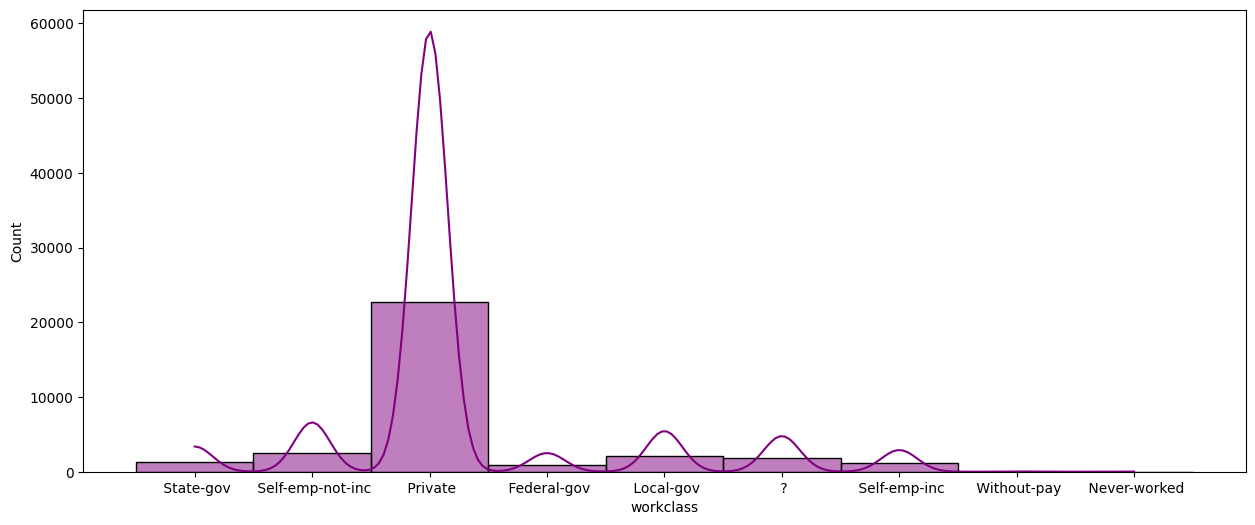

In [13]:
plt.figure(figsize=(15,6))
sns.histplot(data=data,x=data['workclass'],element='bars',kde=True,color='purple')
plt.plot()

##### 1. Private sector dominant over others
##### 2. ? does not have signifacnt values or contribution ot the dataset.

#### 3.7.2 Country

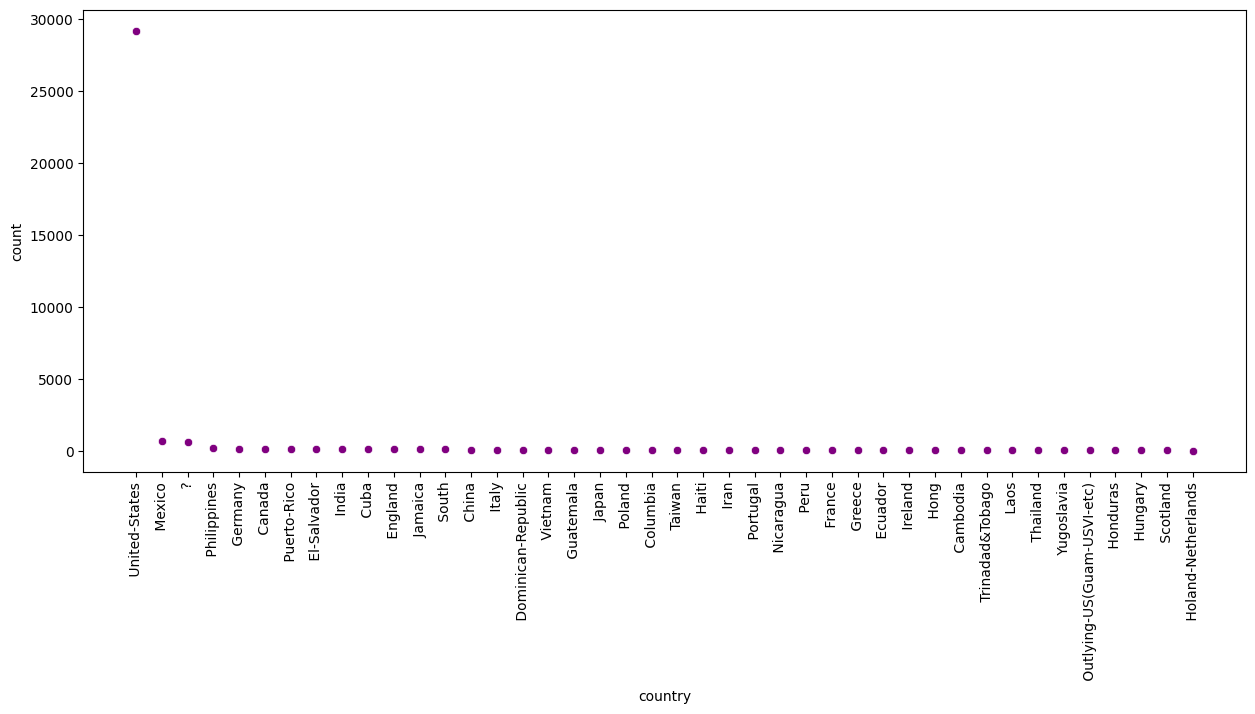

In [14]:
df_con = pd.DataFrame(data["country"].value_counts()).reset_index()
df_con.columns = ["country", "count"]

# Set up the plot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_con, x="country", y="count", color="purple")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### 1.Dominant values are of United States
##### 2.'?' doesn't have significant contribution to the data set 

#### 3.7.3) Occupation

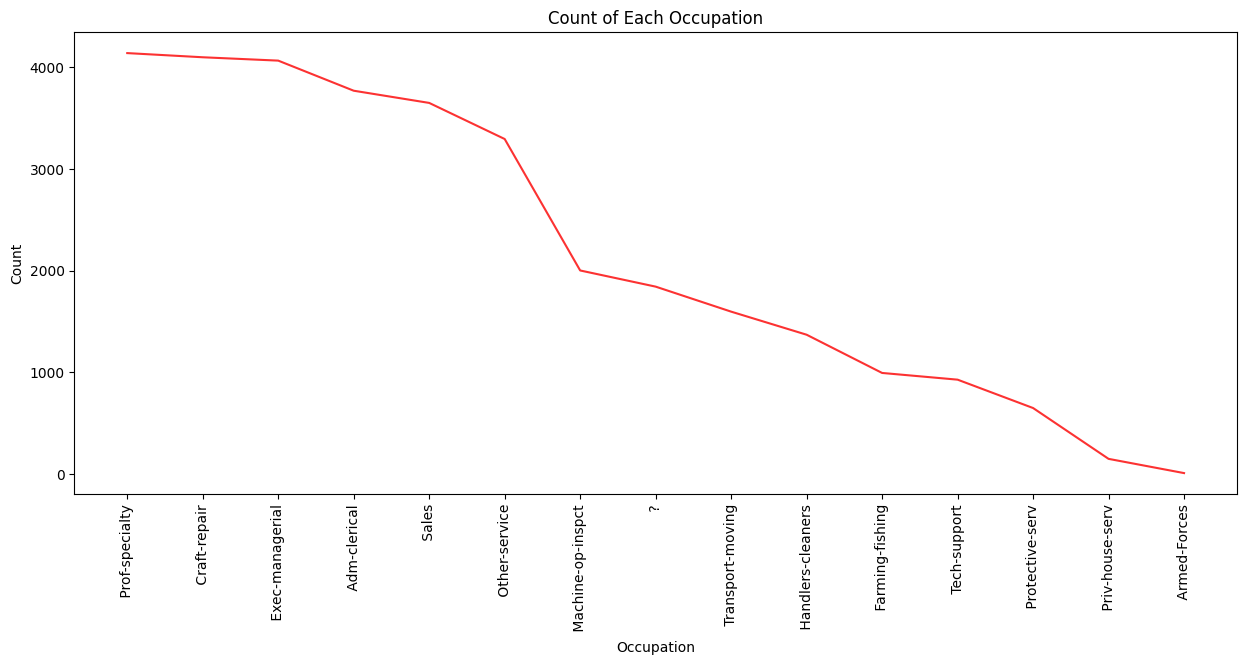

In [15]:
for i in ["occupation"]:
    plt.figure(figsize=(15, 6))
    
    # Create a DataFrame with the count of each occupation
    df_con = pd.DataFrame(data[i].value_counts()).reset_index()
    df_con.columns = [i, 'count']
    
    # Plotting
    sns.lineplot(data=df_con, x=i, y='count', color="#fc3232")
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Set the title and labels
    plt.title(f'Count of Each {i.capitalize()}')
    plt.xlabel(i.capitalize())
    plt.ylabel('Count')

    # Show the plot
    plt.show()

##### Here we will replace '?' with mode value 

In [16]:

data['occupation'].mode()[0]

' Prof-specialty'

In [17]:
data['occupation']=data['occupation'].replace(' ?',np.nan)
data['occupation']=data['occupation'].fillna(data['occupation'].mode()[0])
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

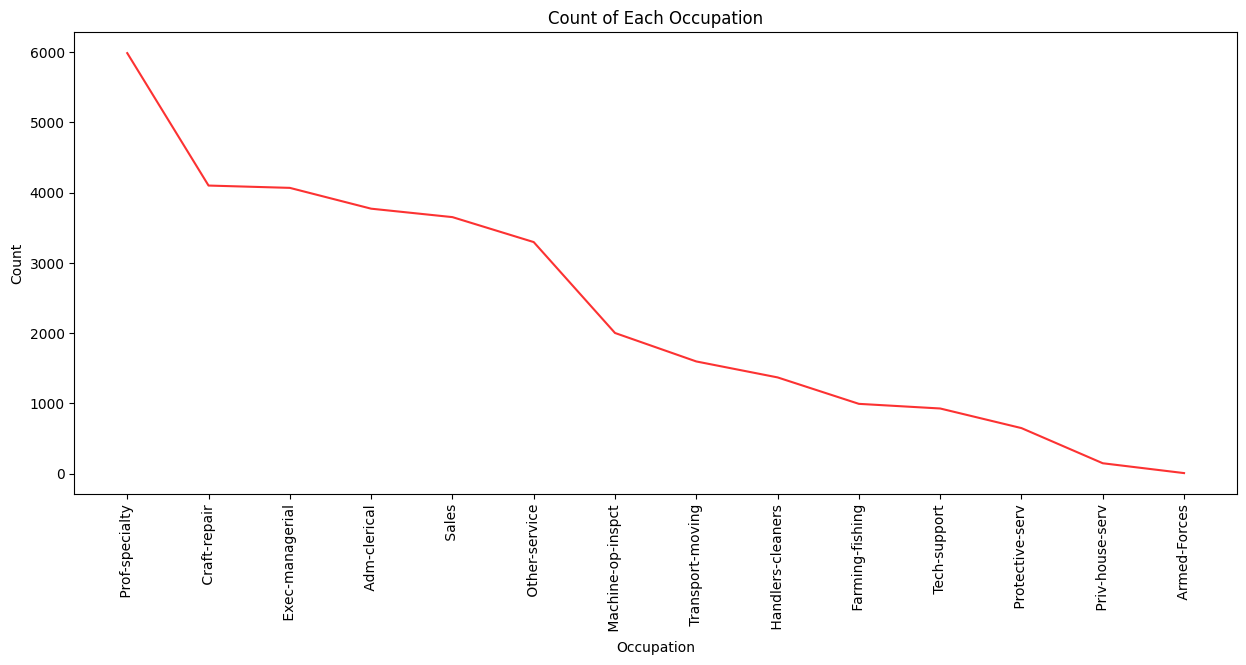

In [18]:

for i in ["occupation"]:
    plt.figure(figsize=(15, 6))
    
    # Create a DataFrame with the count of each occupation
    df_con = pd.DataFrame(data[i].value_counts()).reset_index()
    df_con.columns = [i, 'count']
    
    # Plotting
    sns.lineplot(data=df_con, x=i, y='count', color="#fc3232")
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Set the title and labels
    plt.title(f'Count of Each {i.capitalize()}')
    plt.xlabel(i.capitalize())
    plt.ylabel('Count')

    # Show the plot
    plt.show()

## 4) EDA

### 4.1) Visualizing categorical columns

#### 4.1.1) Race

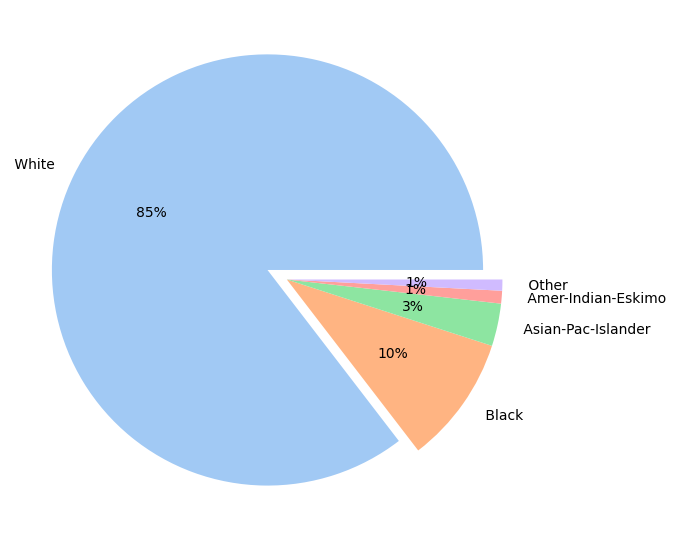

In [19]:
race_counts = data["race"].value_counts()

# Define the explode array to highlight the first slice
explode = [0.1] + [0.0] * (len(race_counts) - 1)

# Plotting the pie chart
plt.figure(figsize=(12, 7))
plt.pie(race_counts, labels=race_counts.index, explode=explode, autopct='%1.0f%%', colors=sns.color_palette("pastel"))

# Show the plot
plt.show()

Maximum is white so we will categories as white and non-white

### 4.1.2) Hours per week

<Axes: xlabel='hours-per-week', ylabel='Count'>

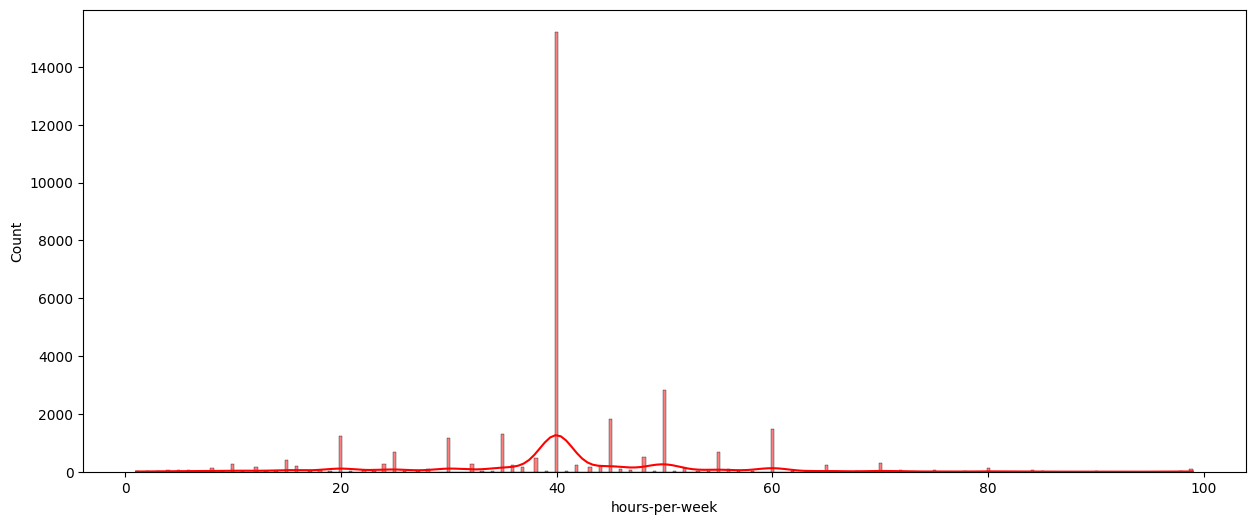

In [20]:
plt.figure(figsize=(15,6))
sns.histplot(data=data, x=data['hours-per-week'], element="bars",kde=True, color="red")

From the graph it is clear that maximum hours per week is 40 ,we can grouped to <=40 & >40

#### Inference From above

1) Maximum number of value in country column is United state , we can grouped it as US and Non-US

2. Maximum number of values in workclass column is Private, we can grouped it as private and non-private

### 4.2) Bivariate Analysis
### Visualizing all columns with salary 

#### 4.2.1) Age and Salary

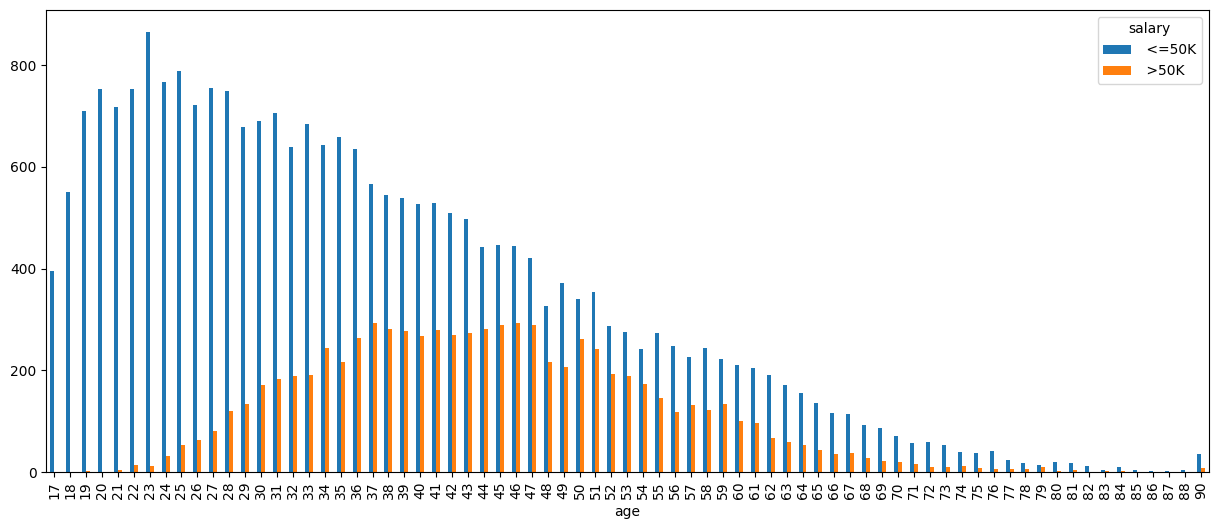

In [21]:
crosstb = pd.crosstab(data.age, data.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

### Inference from above:

1) Most of the populations in there 20's having minimum salary which is obvious as it is starting of the career.

2) Age is directly proportional to salary

3. Data is left skewed , there is are very few people who work in there 60's.

#### 4.2.2) Workclass and salary 

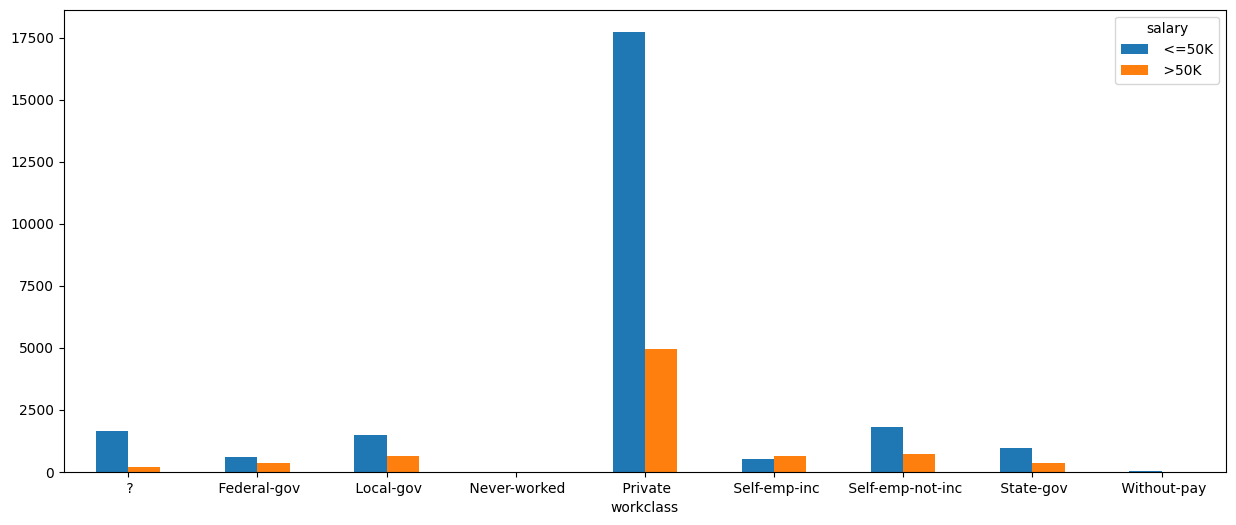

In [22]:
crosstb = pd.crosstab(data.workclass, data.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

#### Inference

1. Salary of most of the population is occupied by private sector whether the salary is <=50K and >50K

2. Only a very few people belonging to private sector have a salary >50k, but it is still more than the sum total of all other sectors recieving salary >50k.

3. A self-employed person that is a buisnessman has slighlty more chances of getting >50k salary.

#### 4.2.3) Education and Salary

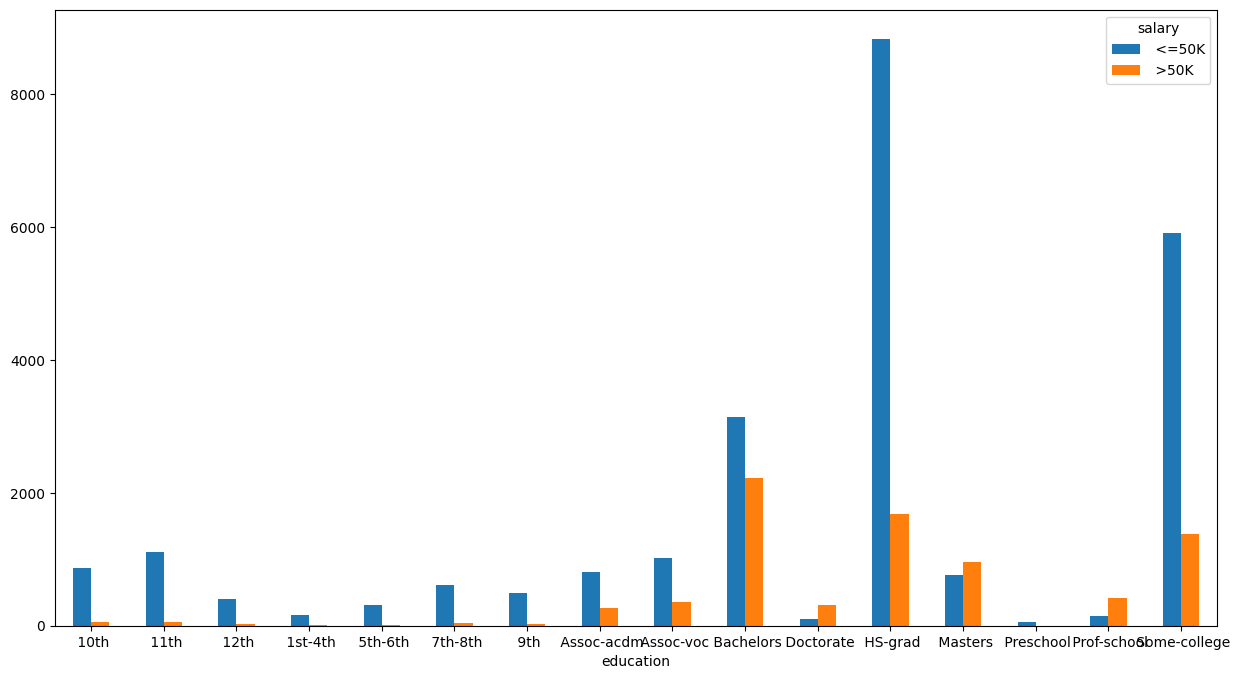

In [23]:
crosstb = pd.crosstab(data.education, data.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,8))

#### Inference from above

1. Bachelors- A person having bachelors has 60:40 chances of getting > or <=50K salary

2. HS_grad- A person who is high school grad has 95:5 chances of getting > or <= 50K salary. Most of the HS-grad are getting salary <=50K which is obvious as they have just completed high school.

3. Some-college- A person attended a college but has no degree is certainly likely to have 75:25 chances of getting <= or > 50 k salary. Surprisingly their are good number of people in this category which is a huge liability to the county and the person itself as they're not getting jobs according to their capabilites.

Another noticable thing is that only a very few pople complete their masters but one with that degree have a 45:55 chance of getting <= or > 50 k salary.

#### 4.2.4) Maritial status and salary

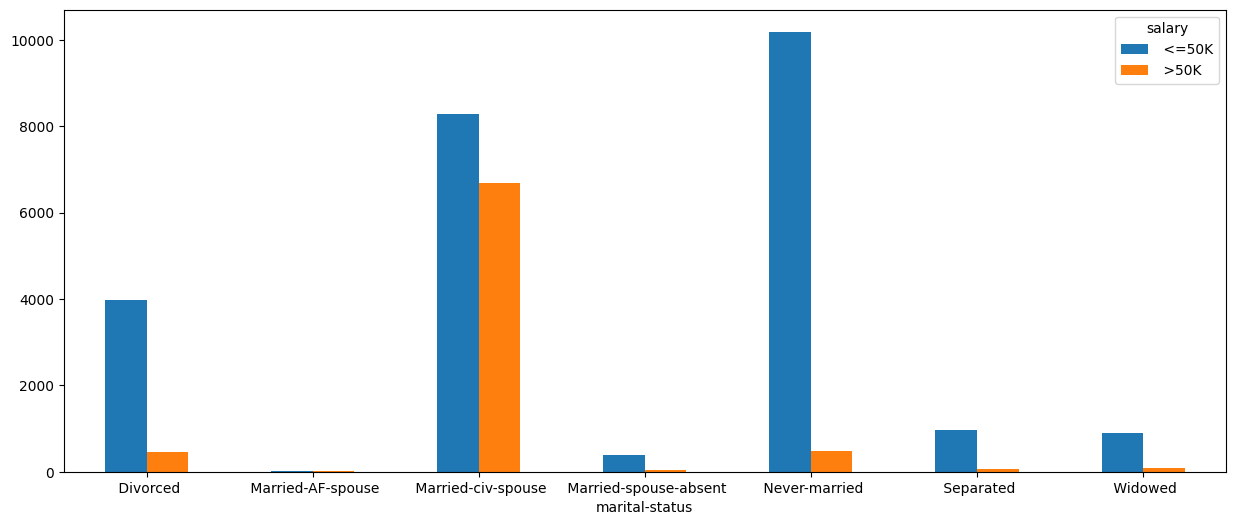

In [24]:
crosstb = pd.crosstab(data["marital-status"], data.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

### Inference from above:

1.Divorced: A divorced person has 90:10 chances of getting <= or > 50 k salary.

2.Married-civ-spouse: A person married to a civillian spouse has 53:47 chances of getting <= or > 50 k salary. People in this domain are almost equal in number.

3.Never-married: A person who has never married has 95:05 chances of getting <= or > 50 k salary. Most of the population is concentrated in this domain.​Another noticable thing is that people who marry a spouse in armed forcues have and equal chance of getting <= or > 50 k salary.

### 4.2.5) Occupation and salary

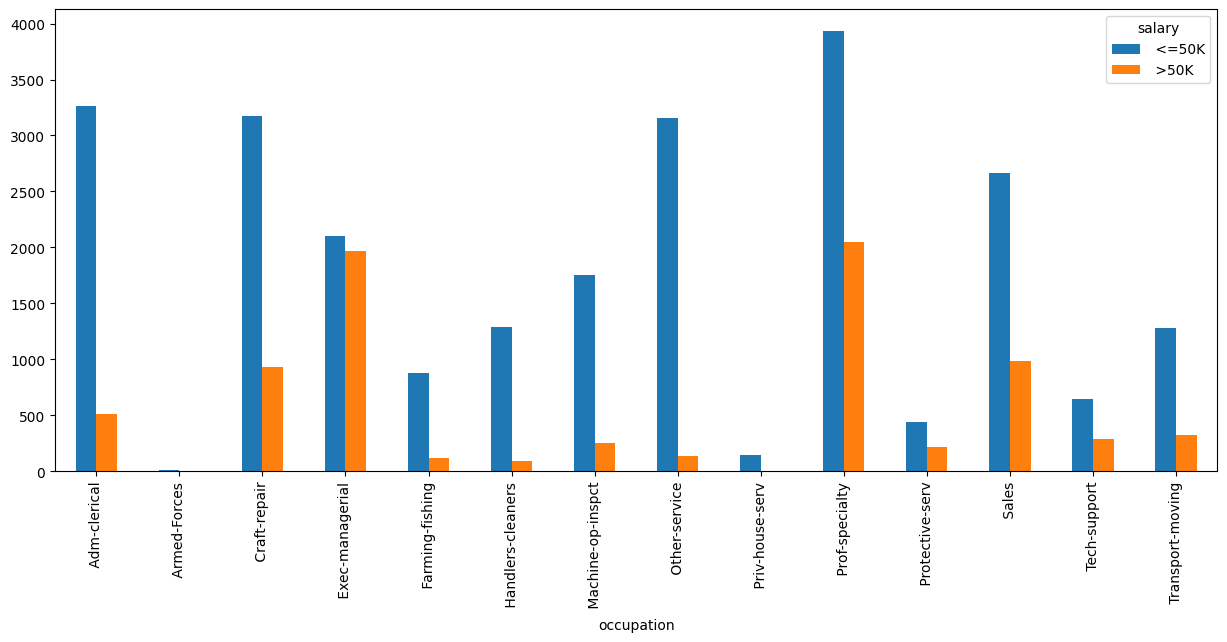

In [28]:
crosstb = pd.crosstab(data.occupation, data.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

1.Population is distributed in all of the occupational fields with minimum in armed forces & maximum in prof-speciality

2.Being in an executive managerial position gives almost equal chances of getiing a <= or > 50k salary.

### 4.2.6) Relationship and salary

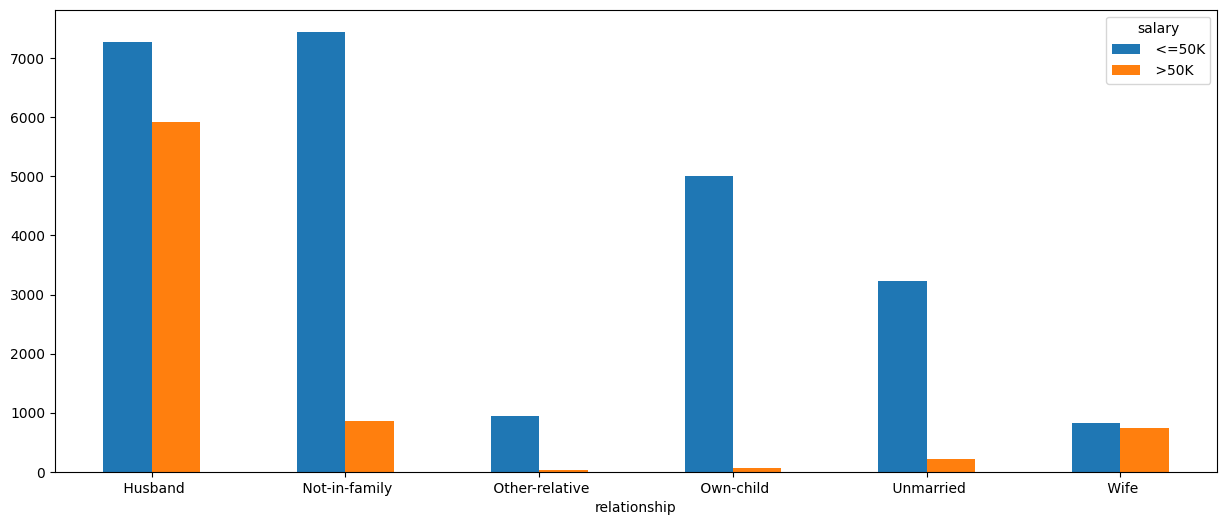

In [30]:
crosstb = pd.crosstab(data.relationship, data.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the people who are earning lie in the category of husbands. They have a 55:45 chances of getting <= or > 50 k salary.

2. A person being an earning wife has equal chances of getting <= or > 50 k salary.

### 4.2.7) Race and salary

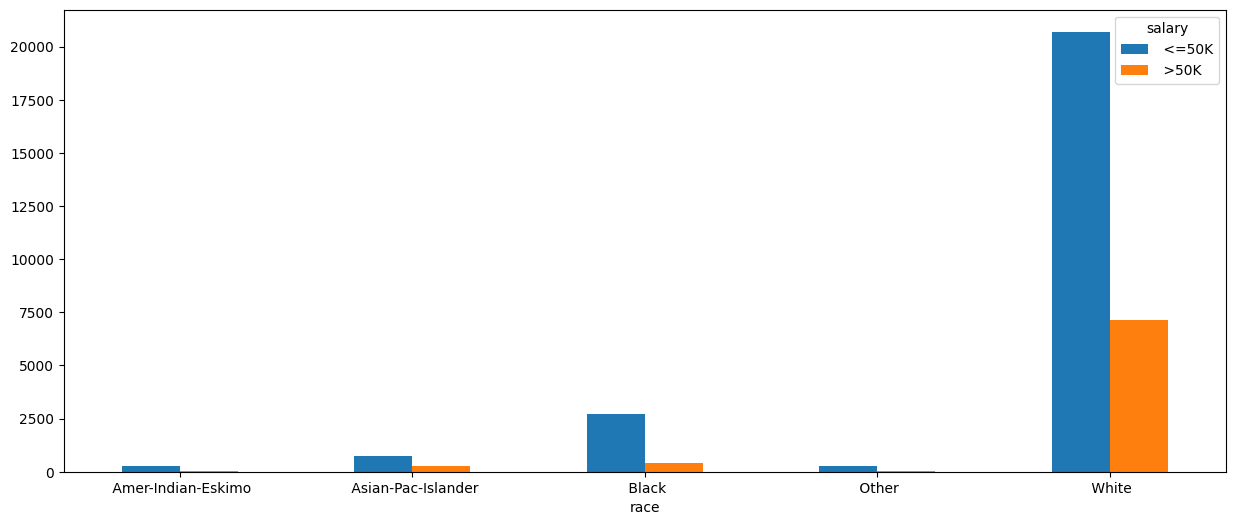

In [31]:
crosstb = pd.crosstab(data.race, data.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

Most of the population is white and has 75:25 chance of getting <= or > 50 k salary.

### 4.2.8) Gender and salary

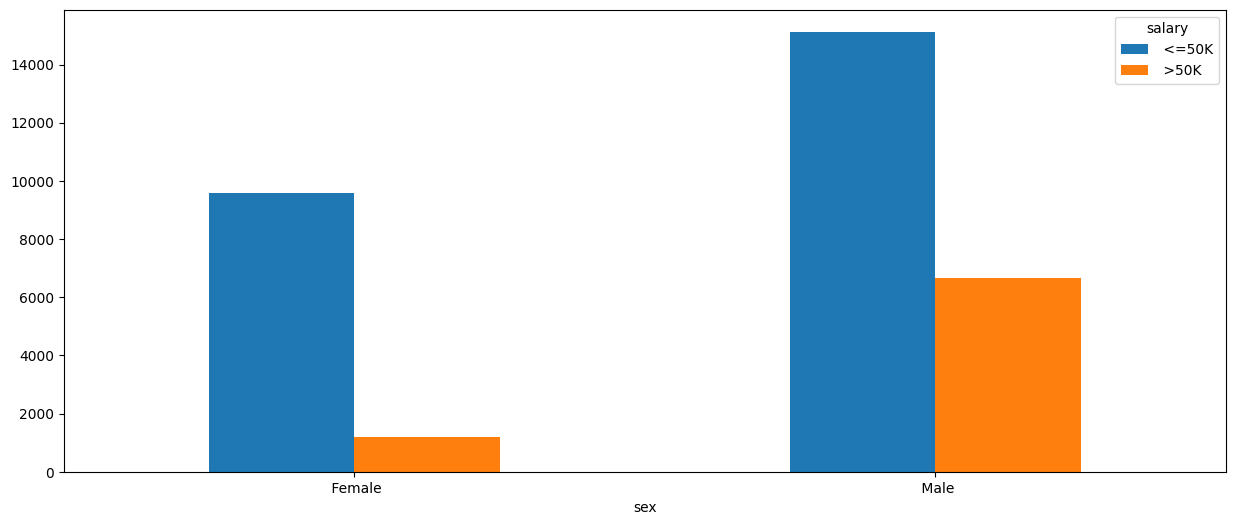

In [33]:
crosstb = pd.crosstab(data.sex, data.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the earning populations is male and has 70:30 chance of getting <= or > 50 k salary.

2. Female have 90:10 chances of getting <= or >50k salary

### 4.2.9) Country and salary

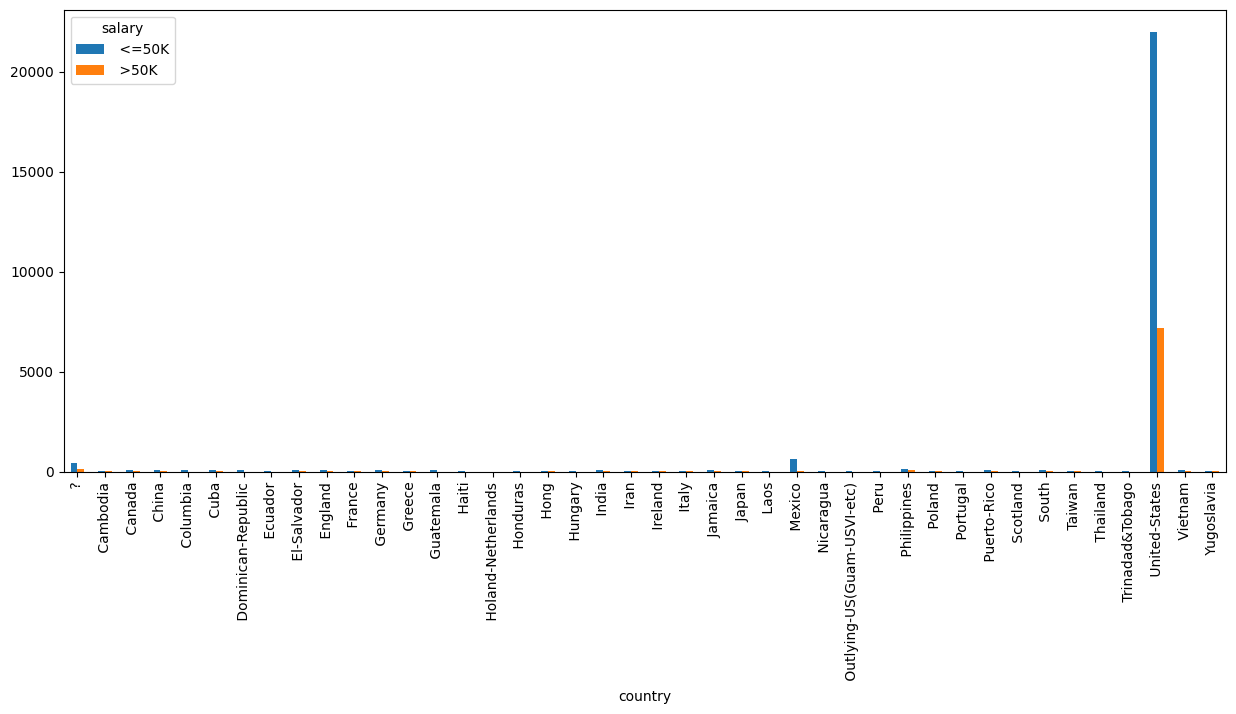

In [35]:
crosstb = pd.crosstab(data.country, data.salary)
barplot = crosstb.plot.bar(rot=90,figsize = (15,6))

United State having maximum population and 75:25 chances of getting <=50 and >50K salary

### 4.2.10) Hours per week and salary 

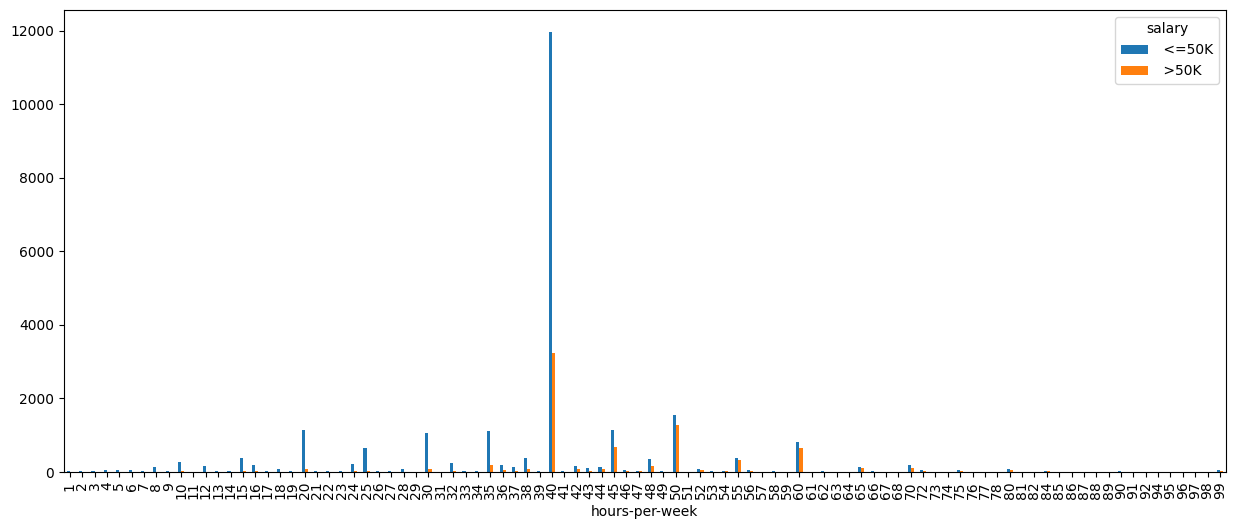

In [36]:
crosstb = pd.crosstab(data["hours-per-week"], data.salary)
barplot = crosstb.plot.bar(rot=0,figsize=(15,6))
plt.xticks(rotation = 90)
plt.show()

Most of the people work for 40 hours per week & have 77:35 chance of getting <= or > 50 k salary.

## Multivariate Analysis

### 4.2.11) Education number,Race & Salary

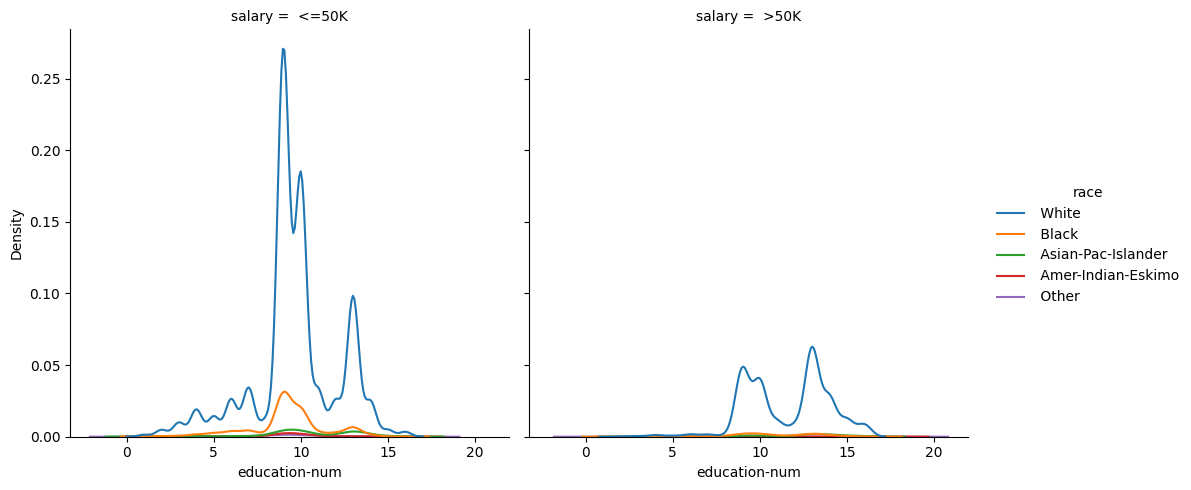

In [37]:
sns.displot(data=data, x=data["education-num"], hue=data["race"], col=data["salary"], kind="kde")

1. Most of the people who are white recieve education for around 9 years and get a salary of <=50 k.

2. Very few white people seem to get education for around 13 years and recieve a salary of >50 k.

3. All other races do not get that much education and therefore have low salary.

### 4.2.12) Hours per week ,relationship and salary

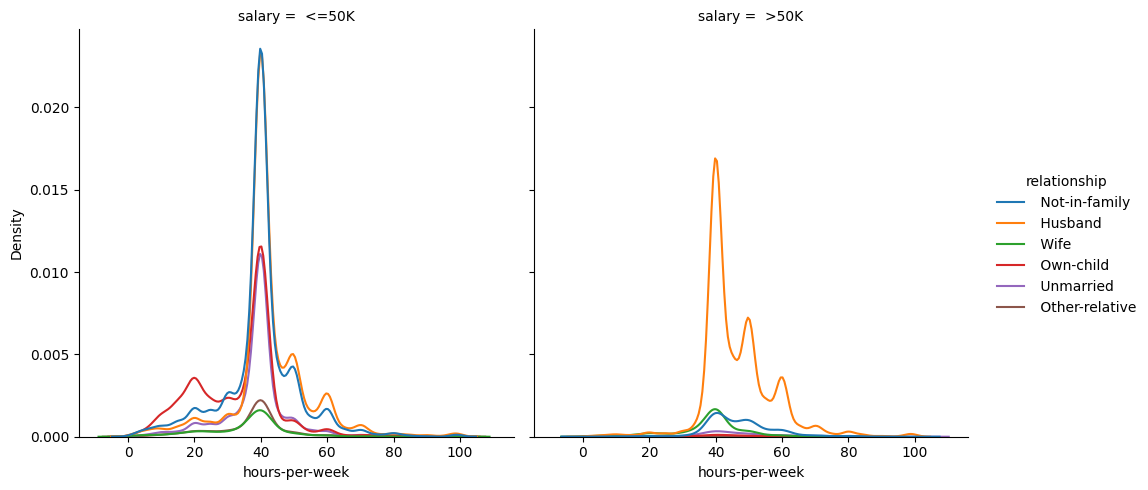

In [38]:
sns.displot(data=data, x=data["hours-per-week"], hue=data["relationship"], col=data["salary"], kind="kde")

1. Most of the people who are not in family work for around 40 hours per week and get a salary of <=50 k.

2. People who have a relationship of husband work for around 40 hours per week and recieve a salary of >50 k.

#### Summary

For getting salary >50k one must lie in the following categories:

1.  Age: 40-55

2.  Workclass: Private/self-employed

3.  Education: Bachelors/Masters

4.  Marital Status : Married-civ-spouse

5.  Occupation : Exec-manager

6.  Relationship : Husband/wife

7.  Race : White

8.  Gender : Male

9.  Country : United-States

10.  Hours per week : >40

In [41]:
data.to_csv('adult_mod.csv')